# Problem 1: EU Cities Temperatures Dataset

## Preprocessing/Analysis (28 pts)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_path = './EuCitiesTemperatures.csv'

df = pd.read_csv(csv_path)
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,NaN,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,NaN,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


### 1. [9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.

In [16]:
def fix_nan(_df, _str):
    if pd.isna(_df[_str]):
        _country = _df.country
        mean_v = np.mean(getattr(df[df.country == _country], _str))
        return round(mean_v, 2)
    else:
        return _df[_str]

In [17]:
df['latitude'] = df.apply(lambda x: fix_nan(x, 'latitude'), axis=1)
df['longitude'] = df.apply(lambda x: fix_nan(x, 'longitude'), axis=1)
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


### 2. [9 pts] Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [18]:
select_df = df[(df.latitude <= 60) & (df.latitude >= 40) & (df.longitude <= 30) & (df.longitude >= 15)]
country_list = select_df.country.to_list()
country_count_dict = {_v: country_list.count(_v) for _v in set(country_list)}
country_count_maxes = [_k for _k, _v in country_count_dict.items() if _v == max(country_count_dict.values())]
country_count_maxes

['Romania', 'Poland']

### 3. [10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (Yes/No) and whether it has a coastline (yes/no). For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will fill it with the average temperature of cities with EU='No' and coastline='Yes')

In [19]:
def fix_temperature(_df):
    if pd.isna(_df.temperature):
        _EU = _df.EU
        _coastline = _df.coastline
        mean_v = np.mean(df[(df.EU == _EU) & (df.coastline == _coastline)].temperature)
        return round(mean_v, 2)
    else:
        return _df.temperature

In [20]:
df['temperature'] = df.apply(lambda x: fix_temperature(x), axis=1)
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.31
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


## Visualization

### 1. [6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

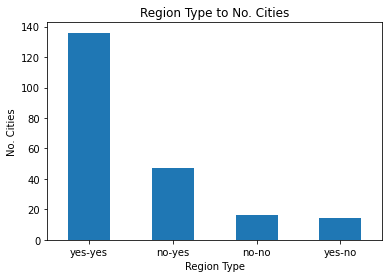

In [26]:
df.loc[:, 'EU-coastline'] = df['EU'].str.cat(df['coastline'], sep='-')
df['EU-coastline'].value_counts().plot.bar(rot=0)
plt.xlabel("Region Type")
plt.ylabel("No. Cities")
plt.title("Region Type to No. Cities")
ax = plt.show()

### 2. [7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

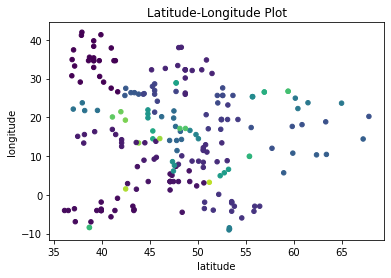

In [30]:
import matplotlib.cm as cm
import matplotlib.colors as colors

colormap = cm.viridis
country_list = list(df.country.value_counts().to_dict().keys())
color_list = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(country_list))]
color_dict = {country_list[idx]: color_list[idx] for idx, _ in enumerate(country_list)}
df.plot.scatter(x='latitude', y='longitude', c=df['country'].map(color_dict))
plt.title("Latitude-Longitude Plot")
plt.show()

### 3. [6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

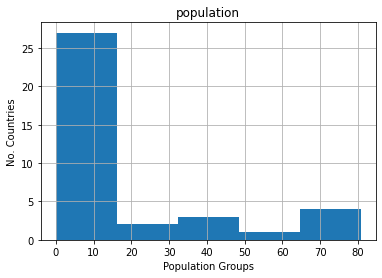

In [31]:
df.loc[:, ['country', 'population']].drop_duplicates('country').hist(bins=5)
plt.xlabel("Population Groups")
plt.ylabel("No. Countries")
plt.show()

### 4. [8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above. Each subplot should be a scatter plot of city v/s temperature, where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to to an array of numbers from 0 to n (number of cities).

In [32]:
def get_color_list(_df):
    _color_list = []
    for _temperature in select_df.temperature.to_list():
        if _temperature > 10:
            _c = 'red'
        elif 10 >= _temperature >= 6:
            _c = 'orange'
        else:
            _c = 'blue'
        _color_list.append(_c)
    return _color_list

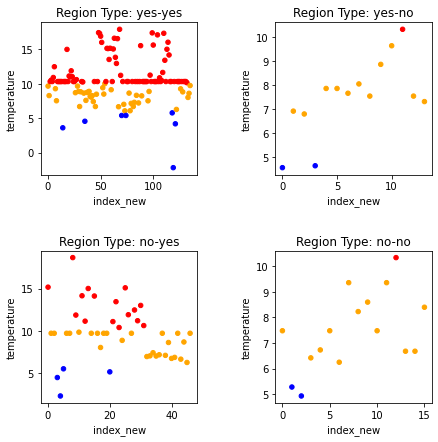

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)
select_df = df[(df.EU == 'yes') & (df.coastline == 'yes')]
select_df.loc[:, 'index_new'] = np.arange(len(select_df))
ax = select_df.plot.scatter(x='index_new', y='temperature', c=get_color_list(select_df), ax=axes[0, 0])
ax.set_title("Region Type: yes-yes")
select_df = df[(df.EU == 'yes') & (df.coastline == 'no')]
select_df.loc[:, 'index_new'] = np.arange(len(select_df))
ax = select_df.plot.scatter(x='index_new', y='temperature', c=get_color_list(select_df), ax=axes[0, 1])
ax.set_title("Region Type: yes-no")
select_df = df[(df.EU == 'no') & (df.coastline == 'yes')]
select_df.loc[:, 'index_new'] = np.arange(len(select_df))
ax = select_df.plot.scatter(x='index_new', y='temperature', c=get_color_list(select_df), ax=axes[1, 0])
ax.set_title("Region Type: no-yes")
select_df = df[(df.EU == 'no') & (df.coastline == 'no')]
select_df.loc[:, 'index_new'] = np.arange(len(select_df))
ax = select_df.plot.scatter(x='index_new', y='temperature', c=get_color_list(select_df), ax=axes[1, 1])
ax.set_title("Region Type: no-no")
plt.show()